In [171]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
from selenium.webdriver.common.keys import Keys

In [172]:
driver = webdriver.Firefox()

In [173]:
driver.get("https://www.nseindia.com/products/content/equities/indices/historical_index_data.htm")

In [174]:
#toDate
element = driver.find_element_by_id("fromDate")
element.send_keys("15-02-2018")

In [145]:
element_ = driver.find_element_by_id("toDate")
element_.send_keys("10-02-2019")

In [148]:
button_ = driver.find_element_by_id("get").click()

In [149]:
from bs4 import BeautifulSoup
html_source = driver.page_source

In [150]:
soup = BeautifulSoup(html_source)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [151]:
# soup.prettify()

In [152]:
table = soup.find_all("div",class_="tabular-data-historic")

In [153]:
x = table[0].find_all("div",attrs={"id":"csvContentDiv"})

In [154]:
y = x[0].text

In [155]:
z = y.split(":")
z = list(map(lambda x: x.replace('"',""),z))

In [156]:
import re
z = list(map(lambda x: re.split(",\s*",x),z))

In [157]:
import pandas as pd
df = pd.DataFrame(z[1:])

In [158]:
df.columns = z[0]

In [159]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-Feb-2018,10537.90,10618.10,10511.05,10545.50,217090245,11035.38
1,16-Feb-2018,10596.20,10612.90,10434.05,10452.30,190043189,10026.71
2,19-Feb-2018,10488.90,10489.35,10302.75,10378.40,193087737,9871.36
3,20-Feb-2018,10391.00,10429.35,10347.65,10360.40,193464871,9619.95
4,21-Feb-2018,10426.00,10426.10,10349.60,10397.45,241331542,12996.36


In [160]:
df.index = pd.to_datetime(df["Date"])

In [161]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,,
2018-02-15,15-Feb-2018,10537.90,10618.10,10511.05,10545.50,217090245,11035.38
2018-02-16,16-Feb-2018,10596.20,10612.90,10434.05,10452.30,190043189,10026.71
2018-02-19,19-Feb-2018,10488.90,10489.35,10302.75,10378.40,193087737,9871.36
2018-02-20,20-Feb-2018,10391.00,10429.35,10347.65,10360.40,193464871,9619.95
2018-02-21,21-Feb-2018,10426.00,10426.10,10349.60,10397.45,241331542,12996.36


In [162]:
import matplotlib.pyplot as plt
%matplotlib inline        

In [163]:
import numpy as np
df.dropna(inplace= True)
for item in df.columns:
    if item != "Date" and item != "Shares Traded":
        df[item] = df[item].astype(float)
    elif item == "Shares Traded":
        df[item] = df[item].astype(int)
df["Open10"] = df["Open"].rolling(10).mean()
df["High10"] = df["High"].rolling(10).mean()
df["Low10"] = df["Low"].rolling(10).mean()
df["Close10"] = df["Close"].rolling(10).mean()
df["Turnover (Rs. Cr)10"] = df["Turnover (Rs. Cr)"].rolling(10).mean()

In [164]:
df.head()
df.to_excel("Nifty50_pastYear.xlsx")

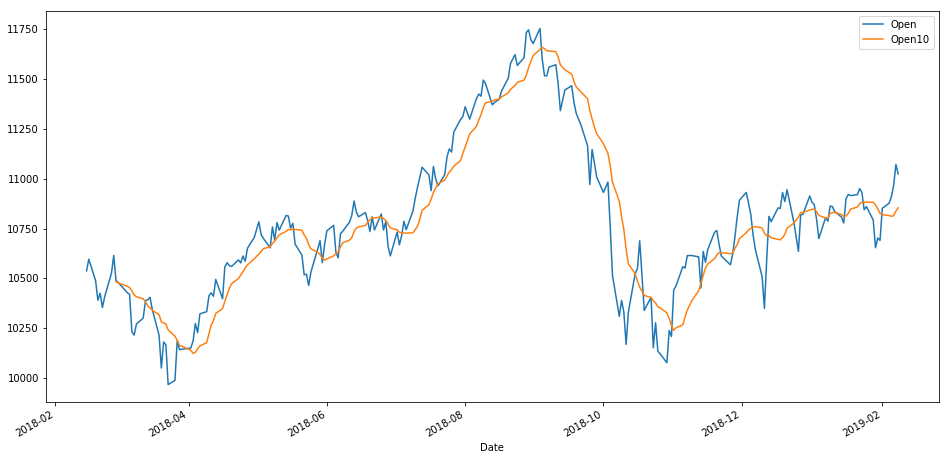

In [165]:
df[['Open','Open10']].plot(label='Open Price each day and its 10 day moving average',figsize=(16,8))

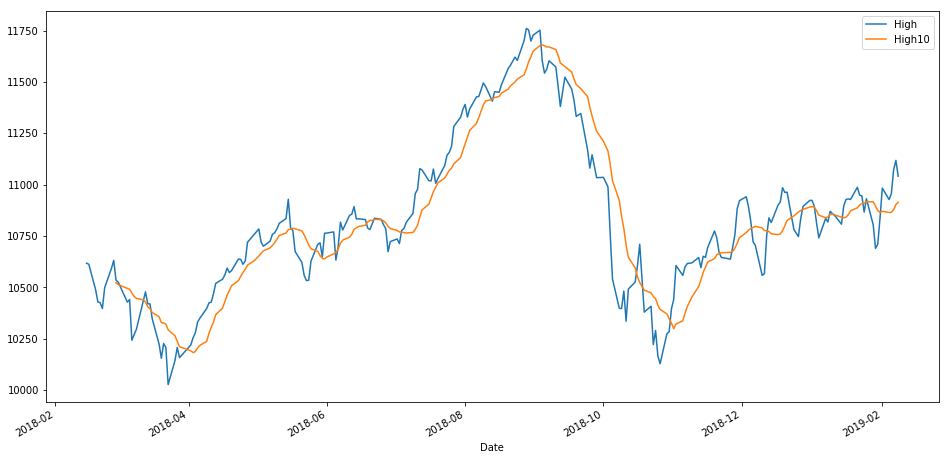

In [166]:
df[['High','High10']].plot(label='Highest Price each day and its 10 day moving average',figsize=(16,8))

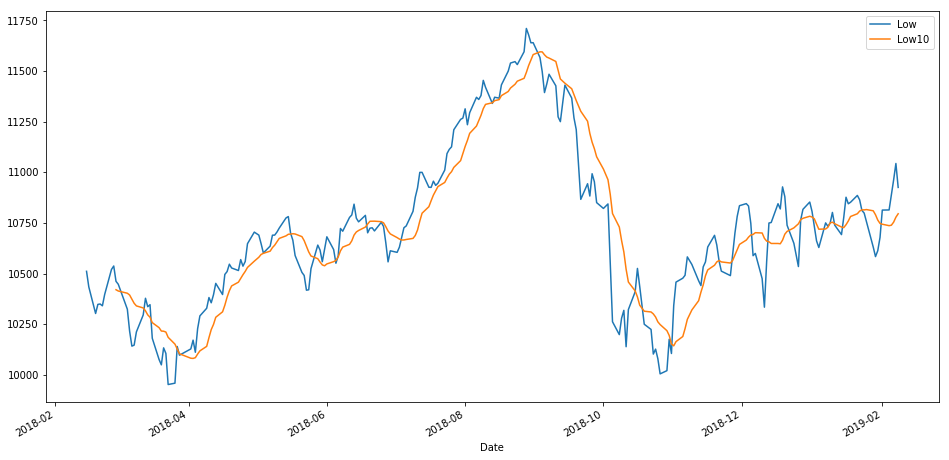

In [167]:
df[['Low','Low10']].plot(label='Lowest Price each day and its 10 day moving average',figsize=(16,8))

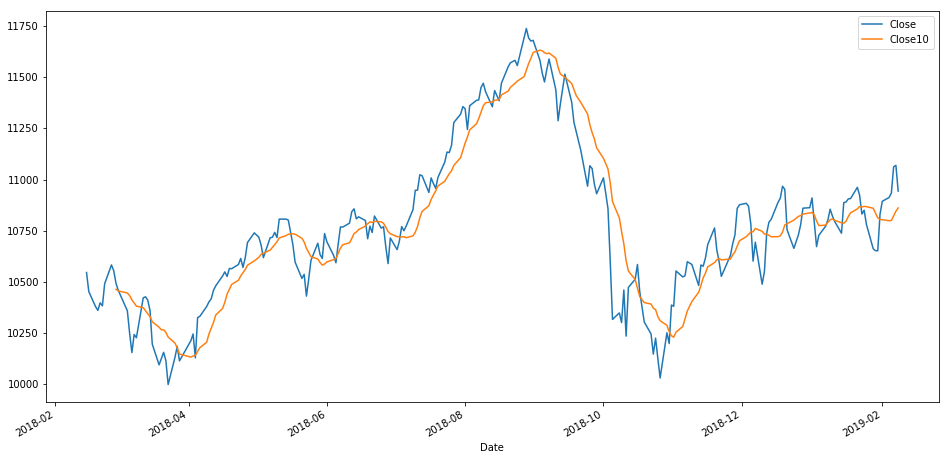

In [168]:
df[['Close','Close10']].plot(label='Close Price each day and its 10 day moving average',figsize=(16,8))

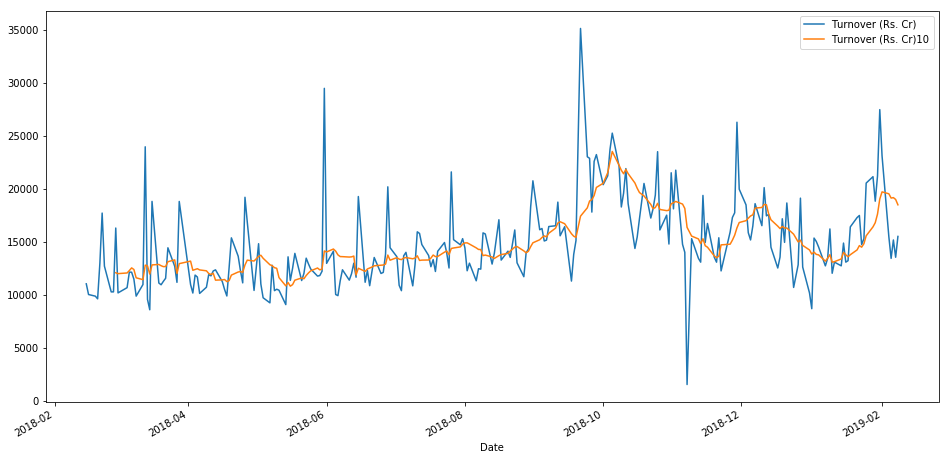

In [169]:
df[['Turnover (Rs. Cr)','Turnover (Rs. Cr)10']].plot(label='Every day Turnover and its 10 day moving average',figsize=(16,8))

In [170]:
df.shape

(244, 12)